In [1]:
!nvidia-smi


Mon May 13 10:22:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ONRrGJFVC9GgYdOf6Nr1")
project = rf.workspace("chicken-detection-e7acb").project("chicken-detection-gkoje")
version = project.version(3)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True


/content
New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chicken-Detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visua

In [7]:
!ls {HOME}/runs/detect/train/


args.yaml					    PR_curve.png	train_batch227.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1715589028.a80cb1c3bf8a.1098.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch225.jpg	weights
P_curve.png					    train_batch226.jpg


/content


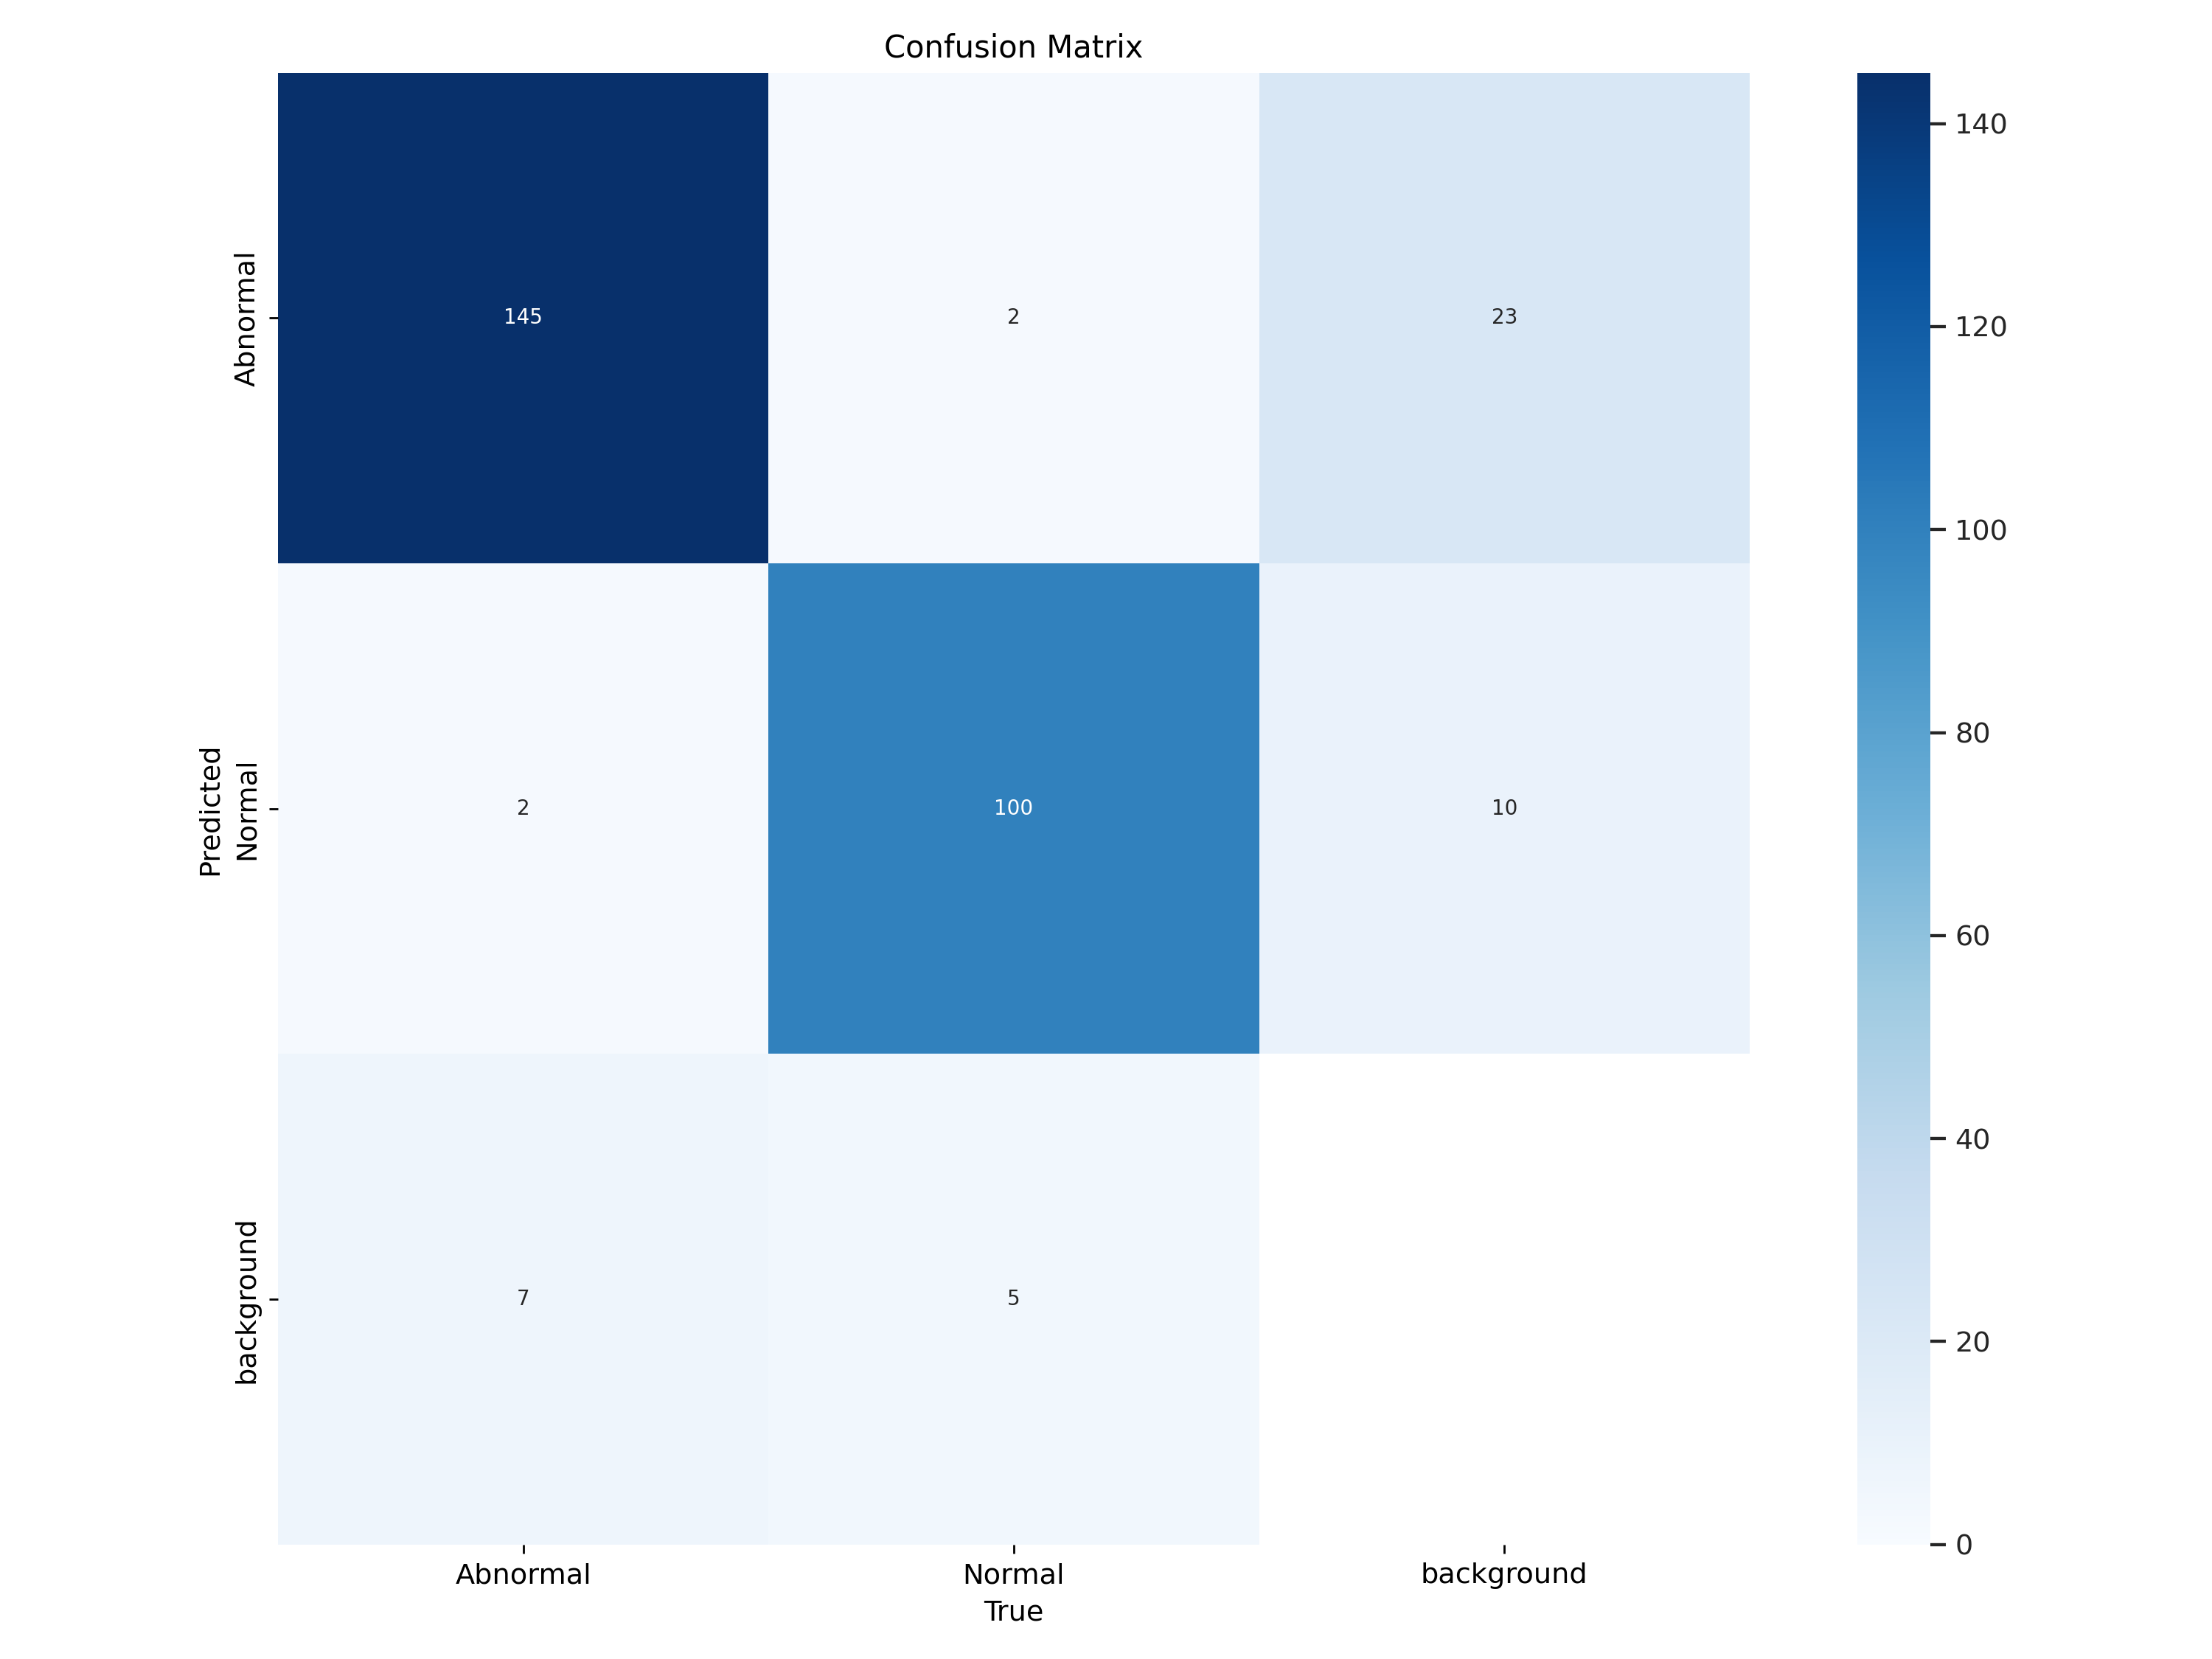

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content


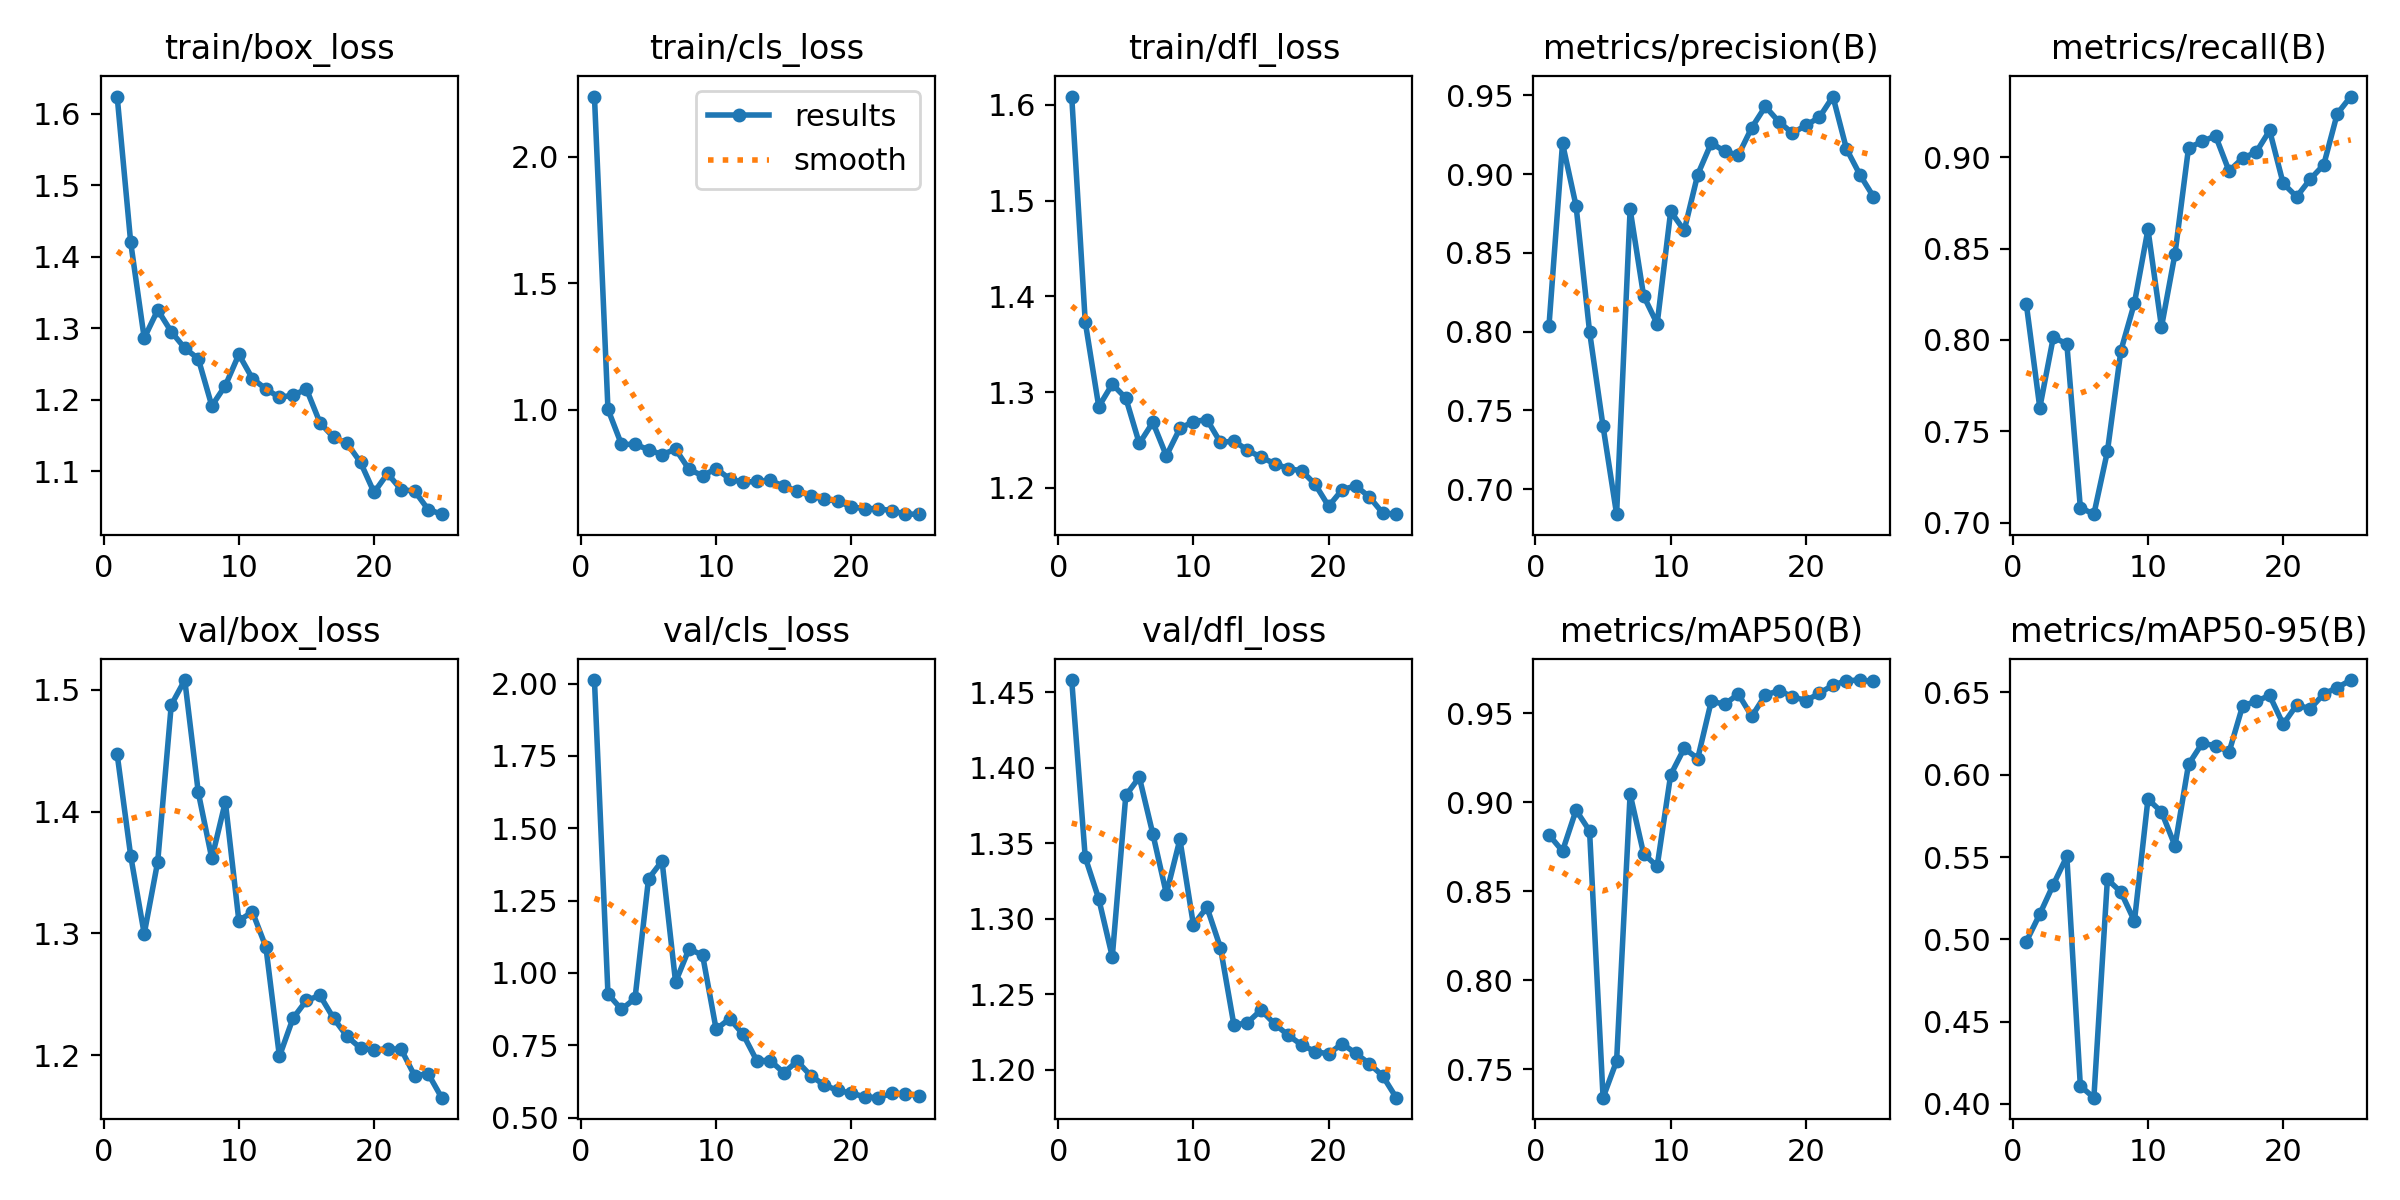

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


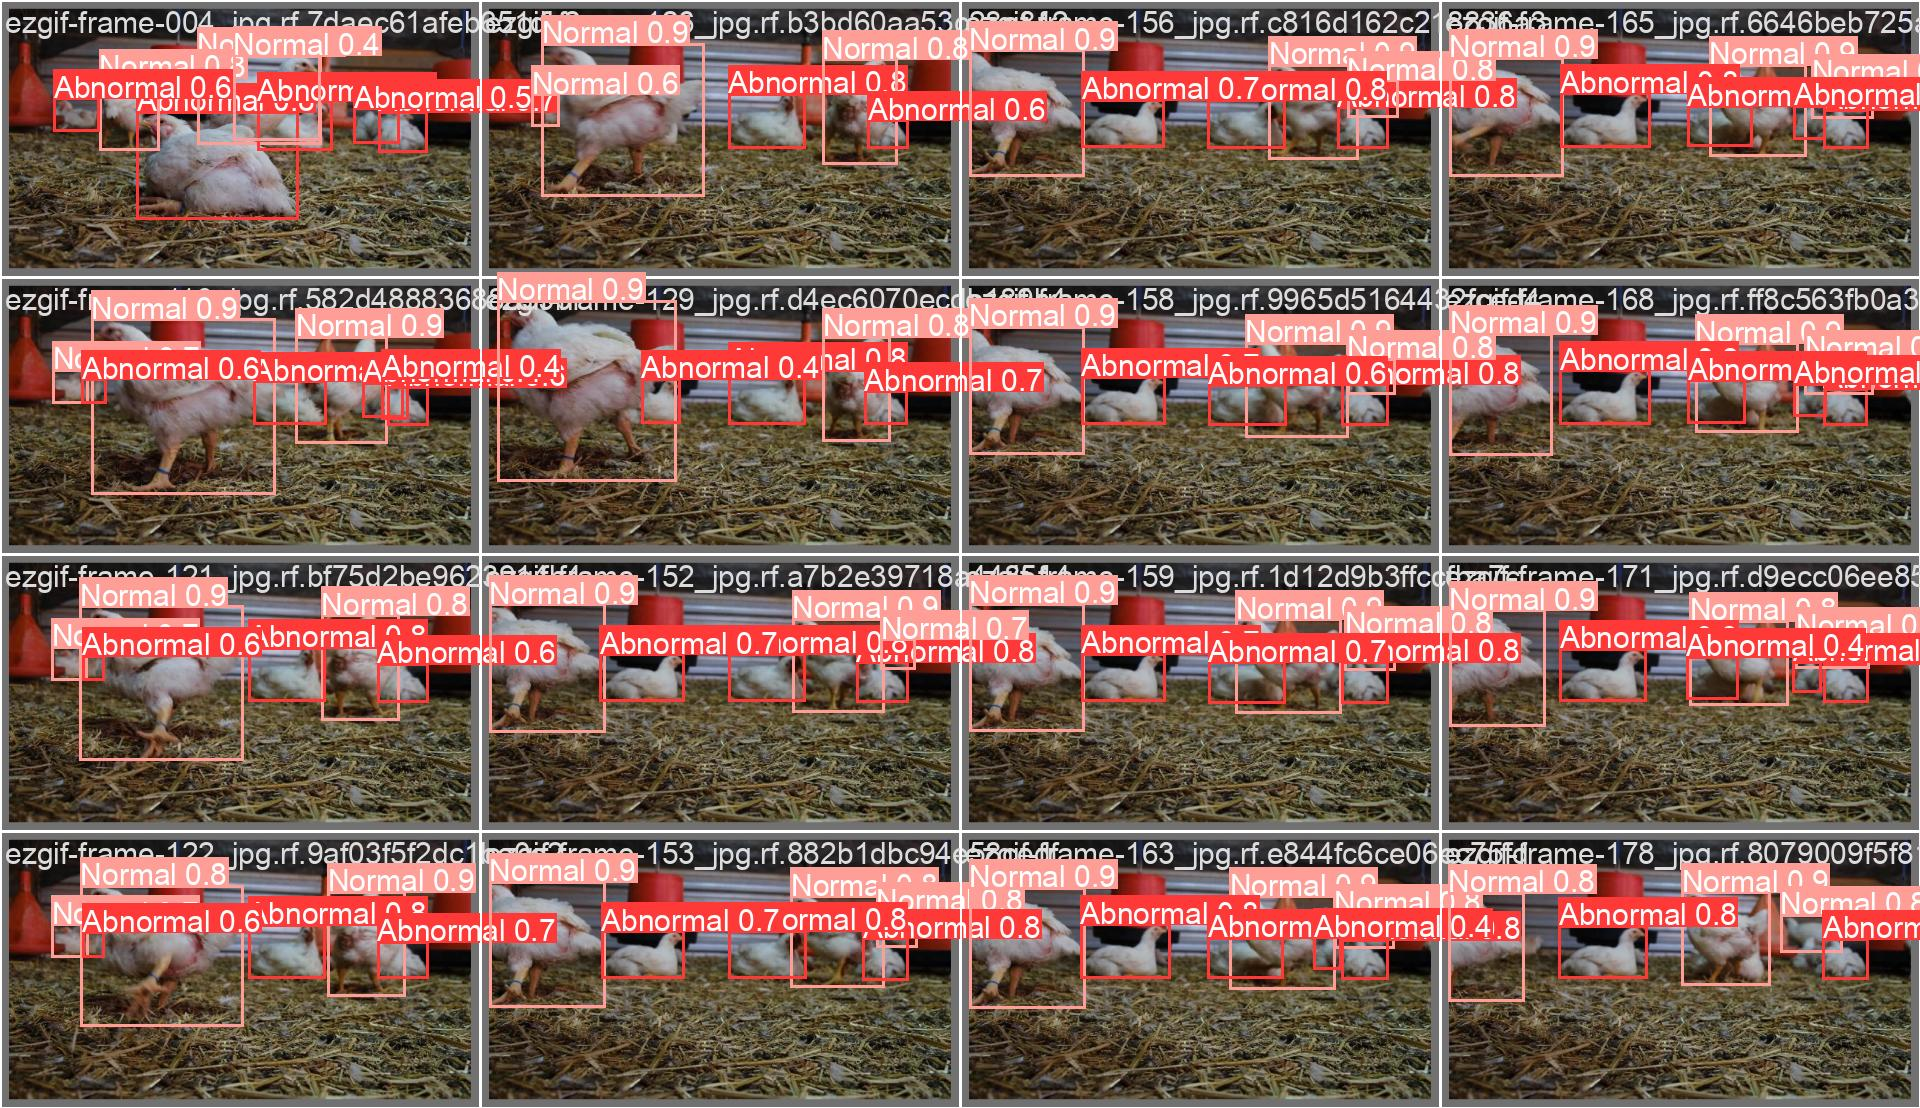

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


In [11]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Chicken-Detection-3/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:10<00:00,  1.47s/it]
                   all        104        954      0.879      0.332      0.419      0.264
              Abnormal        104        280      0.837      0.514      0.575      0.353
                Normal        104        674       0.92       0.15      0.262      0.174
Speed: 9.4ms preprocess, 29.3ms inference, 0.0ms loss, 16

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/53 /content/datasets/Chicken-Detection-3/test/images/0006_jpg.rf.c5d3954c4c1a3f7195acfba9cbce4549.jpg: 480x800 1 Abnormal, 107.0ms
image 2/53 /content/datasets/Chicken-Detection-3/test/images/0012_jpg.rf.1f396e8b6d4630eda3ca263fa0fc2a2d.jpg: 480x800 (no detections), 15.4ms
image 3/53 /content/datasets/Chicken-Detection-3/test/images/0023_jpg.rf.012c4282946af70d9bd10be5589b3d7d.jpg: 480x800 (no detections), 15.2ms
image 4/53 /content/datasets/Chicken-Detection-3/test/images/0024_jpg.rf.8d6474d7a1eff0f10b686749c403dec0.jpg: 480x800 (no detections), 15.2ms
image 5/53 /content/datasets/Chicken-Detection-3/test/images/0027_jpg.rf.3c902bebfd455c12e83728281860c238.jpg: 480x800 (no detections), 15.3ms
image 6/53 /content/datasets/Chicken-Detection-3/test/images/0028_jpg.rf.18493e2b3a8e10c093b945325ec3723b.jpg:

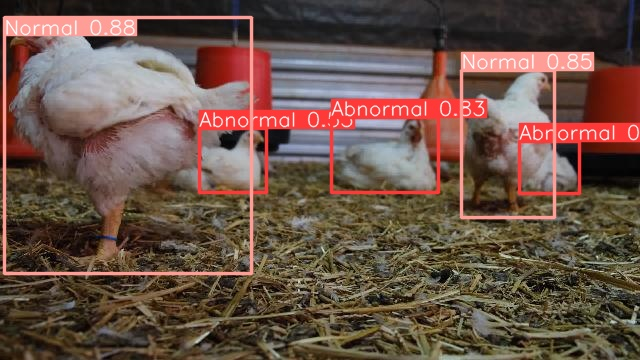

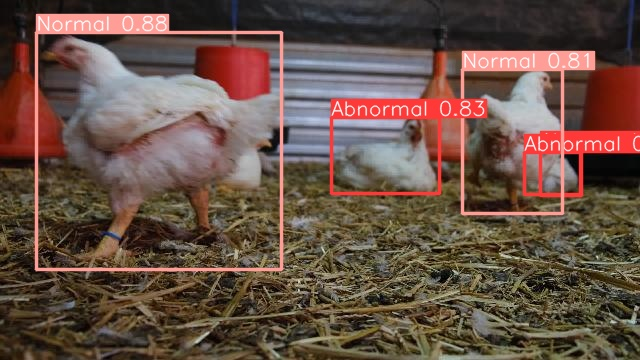

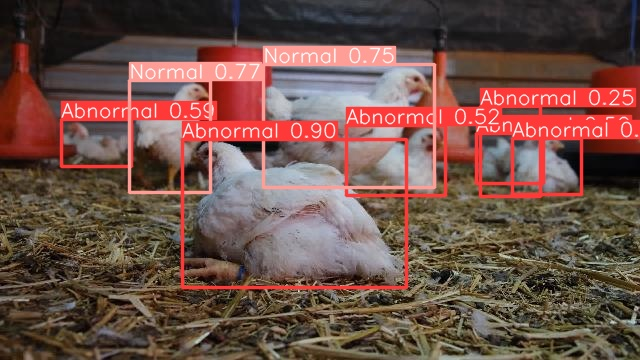

In [13]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
print("\n")

In [15]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Testchicken.mp4


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 129.9ms
video 1/1 (2/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.5ms
video 1/1 (3/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.9ms
video 1/1 (4/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 18.9ms
video 1/1 (5/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.5ms
video 1/1 (6/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.4ms
video 1/1 (7/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.4ms
video 1/1 (8/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.4ms
video 1/1 (9/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Normals, 15.4ms
video 1/1 (10/4952) /content/Testchicken.mp4: 480x800 5 Abnormals, 3 Norm